# Ensemble Learning

## Initial Imports

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [5]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Read the CSV and Perform Basic Data Cleaning

In [6]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   68817 non-null  float64
 1   int_rate                    68817 non-null  float64
 2   installment                 68817 non-null  float64
 3   home_ownership              68817 non-null  object 
 4   annual_inc                  68817 non-null  float64
 5   verification_status         68817 non-null  object 
 6   issue_d                     68817 non-null  object 
 7   loan_status                 68817 non-null  object 
 8   pymnt_plan                  68817 non-null  object 
 9   dti                         68817 non-null  float64
 10  delinq_2yrs                 68817 non-null  float64
 11  inq_last_6mths              68817 non-null  float64
 12  open_acc                    68817 non-null  float64
 13  pub_rec                     688

## Split the Data into Training and Testing

In [8]:
# Create our features
X = df.copy()
X.drop('loan_status',axis=1,inplace=True)
X=pd.get_dummies(X) # to convert objects into binary data ( 1 is where instance was present)
# Create our target
y=df['loan_status']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            68817 non-null  float64
 1   int_rate                             68817 non-null  float64
 2   installment                          68817 non-null  float64
 3   annual_inc                           68817 non-null  float64
 4   dti                                  68817 non-null  float64
 5   delinq_2yrs                          68817 non-null  float64
 6   inq_last_6mths                       68817 non-null  float64
 7   open_acc                             68817 non-null  float64
 8   pub_rec                              68817 non-null  float64
 9   revol_bal                            68817 non-null  float64
 10  total_acc                            68817 non-null  float64
 11  out_prncp                   

In [10]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [11]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)


## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [12]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler=scaler.fit(X_train)

In [14]:
# Scale the training and testing data
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

## Ensemble Learners

In this section, we will compare two ensemble algorithms to determine which algorithm results in the best performance. Train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [15]:
# Resample the training data with the BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=500, random_state=1)
brf_model.fit(X_train_scaled, y_train)
y_pred_brf = brf_model.predict(X_test_scaled)

In [16]:
# Calculated the balanced accuracy score
acc_score_brf=balanced_accuracy_score(y_test,y_pred_brf)
acc_score_brf

0.7781475469810779

In [17]:
# Display the confusion matrix
print(confusion_matrix(y_test,y_pred_brf))

[[   66    35]
 [ 1662 15442]]


In [18]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test,y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.65      0.90      0.07      0.77      0.58       101
   low_risk       1.00      0.90      0.65      0.95      0.77      0.60     17104

avg / total       0.99      0.90      0.65      0.94      0.77      0.60     17205



In [20]:
# List the features sorted in descending order by feature importance
importance=brf_model.feature_importances_

importances_sorted = sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:15]

[(0.06661463495120314, 'total_rec_prncp'),
 (0.06318721529567178, 'total_rec_int'),
 (0.06061788889673201, 'total_pymnt'),
 (0.05826808075239343, 'total_pymnt_inv'),
 (0.0517793455702452, 'last_pymnt_amnt'),
 (0.030814261825048914, 'int_rate'),
 (0.018223876144473468, 'issue_d_Jan-2019'),
 (0.01758748442537316, 'installment'),
 (0.01701350913498804, 'dti'),
 (0.01643946938793743, 'mo_sin_old_rev_tl_op'),
 (0.01638879681134762, 'mths_since_recent_inq'),
 (0.01598335431546418, 'max_bal_bc'),
 (0.01582245081932586, 'out_prncp'),
 (0.015375773559199038, 'issue_d_Mar-2019'),
 (0.015335352361938786, 'out_prncp_inv')]

In [18]:

rf_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
acc_score_rf=balanced_accuracy_score(y_test,y_pred_rf)
acc_score_rf
print(confusion_matrix(y_test,y_pred_rf))
importance=rf_model.feature_importances_

importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[[   37    64]
 [    5 17099]]


[(0.07486922500536883, 'total_rec_int'),
 (0.06686220515014932, 'total_pymnt_inv'),
 (0.06573260493444634, 'total_rec_prncp'),
 (0.06380464409414062, 'last_pymnt_amnt'),
 (0.05475103896804395, 'total_pymnt'),
 (0.021471589076600003, 'installment'),
 (0.02111947211128395, 'out_prncp_inv'),
 (0.01926514456622541, 'out_prncp'),
 (0.01745217216062875, 'dti'),
 (0.01581677533386419, 'mo_sin_old_il_acct')]

In [19]:
acc_score_rf

0.6830221521918328

In [20]:
print(confusion_matrix(y_test,y_pred_rf))

[[   37    64]
 [    5 17099]]


In [21]:
print(classification_report_imbalanced(y_test,y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.65      0.90      0.07      0.77      0.58       101
   low_risk       1.00      0.90      0.65      0.95      0.77      0.60     17104

avg / total       0.99      0.90      0.65      0.94      0.77      0.60     17205



importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


Bad key savefig.frameon in file C:\Users\sumit\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\sumit\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\sumit\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

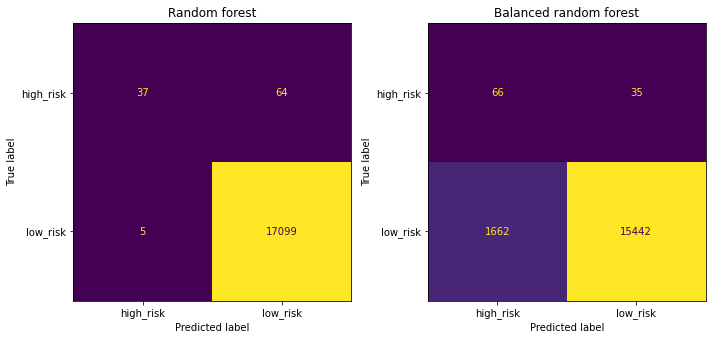

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
plot_confusion_matrix(rf_model, X_test_scaled, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("Random forest")

plot_confusion_matrix(brf_model, X_test_scaled, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Balanced random forest")

fig.tight_layout()

### Easy Ensemble Classifier

In [27]:
# Train the Classifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier

base_estimator = AdaBoostClassifier(n_estimators=10)
eec = EasyEnsembleClassifier(n_estimators=10, base_estimator=base_estimator)
eec.fit(X_train_scaled, y_train)
y_pred_eec = eec.predict(X_test_scaled)

rusboost = RUSBoostClassifier(n_estimators=10, base_estimator=base_estimator)
rusboost.fit(X_train_scaled, y_train)
y_pred_rusboost = rusboost.predict(X_test_scaled)

In [29]:
# Calculated the balanced accuracy score and geometric_mean_score
from imblearn.metrics import geometric_mean_score
print("Easy ensemble classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_eec):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_eec):.2f}"
)
print("RUSBoost classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rusboost):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_rusboost):.2f}"
)

Easy ensemble classifier performance:
Balanced accuracy: 0.83 - Geometric mean 0.83
RUSBoost classifier performance:
Balanced accuracy: 0.87 - Geometric mean 0.87


In [24]:
# Print the imbalanced classification report

print("Easy ensemble classifier classification report:")
print(classification_report_imbalanced(y_test,y_pred_eec))
    
print("RUSBoost classifier classification report:")
print(classification_report_imbalanced(y_test,y_pred_rusboost))

Easy ensemble classifier classification report:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.77      0.89      0.07      0.83      0.68       101
   low_risk       1.00      0.89      0.77      0.94      0.83      0.69     17104

avg / total       0.99      0.89      0.77      0.94      0.83      0.69     17205

RUSBoost classifier classification report:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.06      0.79      0.93      0.11      0.86      0.72       101
   low_risk       1.00      0.93      0.79      0.96      0.86      0.74     17104

avg / total       0.99      0.93      0.79      0.96      0.86      0.74     17205



In [25]:
# Display the confusion matrix
print("Easy ensemble classifier confusion matrix:")
print(confusion_matrix(y_test,y_pred_eec))
    
print("RUSBoost classifier confusion matrix:")
print(confusion_matrix(y_test,y_pred_rusboost))

Easy ensemble classifier confusion matrix:
[[   78    23]
 [ 1903 15201]]
RUSBoost classifier confusion matrix:
[[   80    21]
 [ 1258 15846]]


### Final Questions

1. Which model had the best balanced accuracy score?

    Easy ensemble has accuracy score of 0.83 compared to 0.778 for Balanced Random Forest and 0.683 for Random Forest .

2. Which model had the best recall score?

    Easy ensemble has accuracy score of 0.77 compared to 0.65 for Balanced Random Forest and 0.65 for Random Forest .

3. Which model had the best geometric mean score?

    Easy ensemble has accuracy score of 0.83 compared to 0.77 for Balanced Random Forest and 0.77 for Random Forest .

4. What are the top three features?
    The three top features for determining high risk loans are
 `(0.06661463495120314, 'total_rec_prncp'),
 (0.06318721529567178, 'total_rec_int'),
 (0.06061788889673201, 'total_pymnt'.`